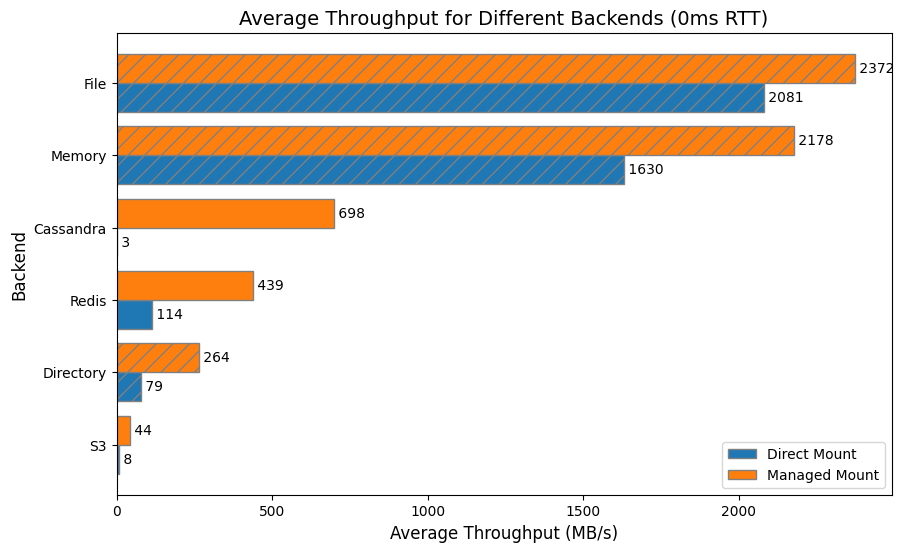

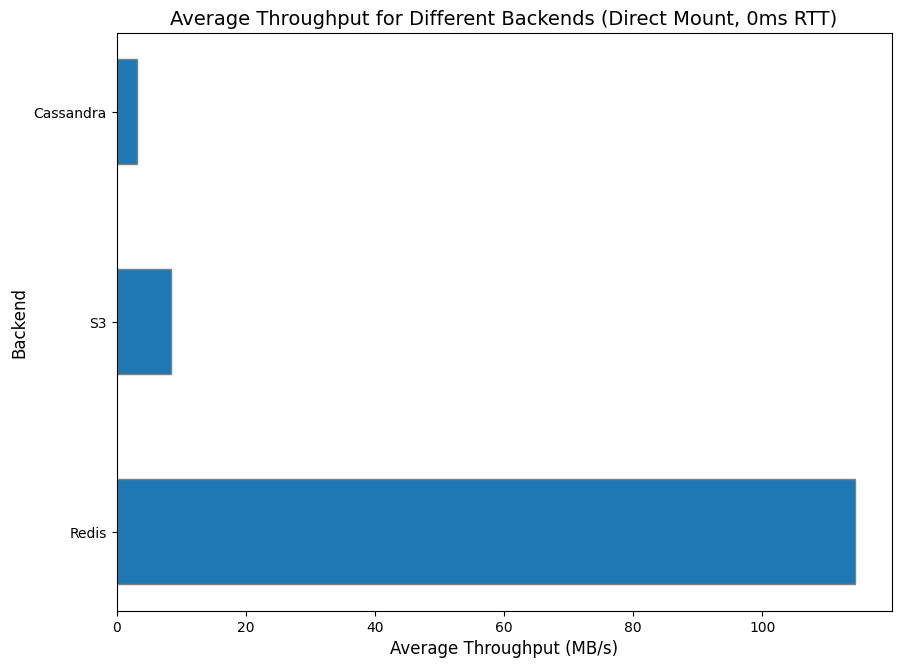

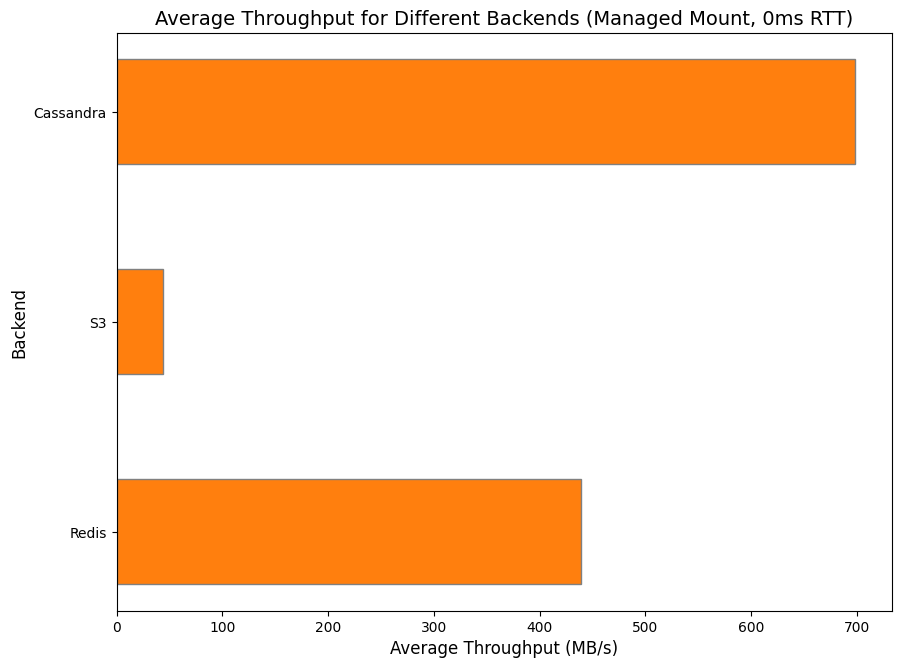

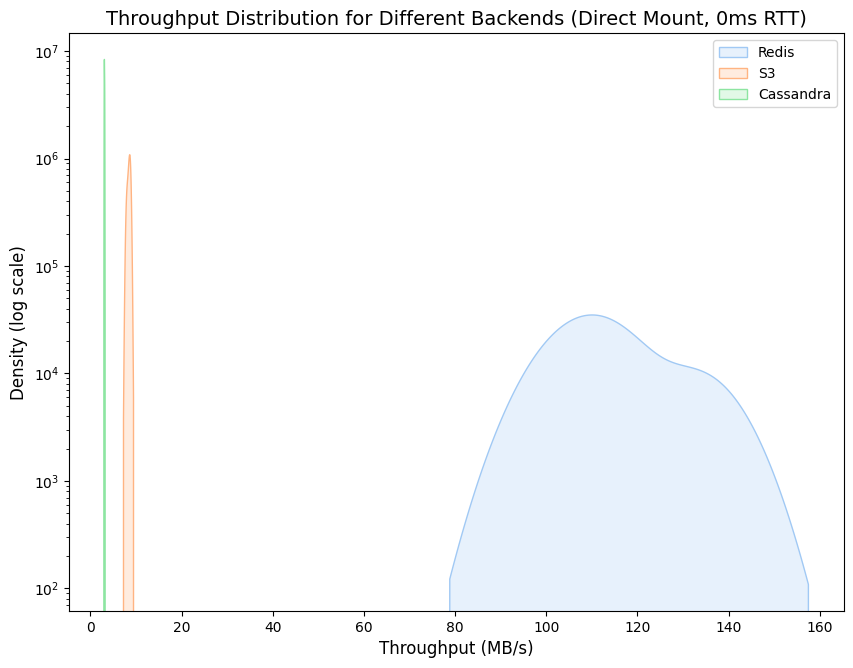

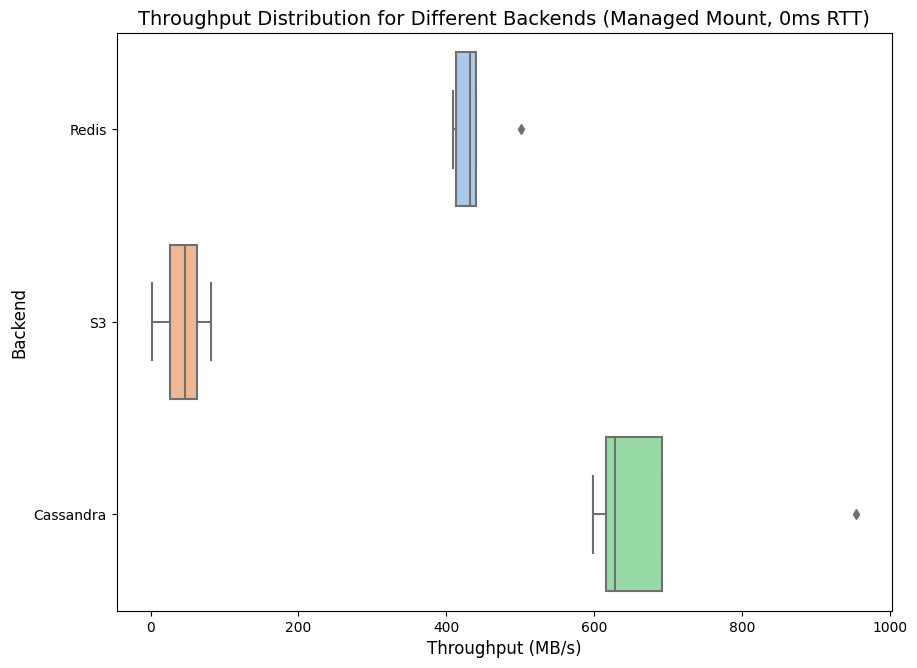

In [37]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../bench/throughput-backendvar/results.csv')

# Display the first few rows of the dataset

import matplotlib.pyplot as plt

# Extract backend names
backend_names = [name.split(" ")[2] for name in df.columns if "Direct Mount" in name]

# Calculate average throughput for each backend
average_throughput_direct = [df[col].mean() for col in df.columns if "Direct Mount" in col]
average_throughput_managed = [df[col].mean() for col in df.columns if "Managed Mount" in col]

# Set width of bar
bar_width = 0.4

# Set position of bar on X axis
r1 = range(len(backend_names))
r2 = [x + bar_width for x in r1]

# Create a list of hatch patterns, with dots for Memory, File, and Directory backends, and none for the others
hatch_patterns = ['...' if backend in ['Memory', 'File', 'Directory'] else '' for backend in backend_names]

# Combine the backend names and average throughput into a list of tuples and sort by average throughput
combined_throughput = sorted(list(zip(backend_names, average_throughput_direct, average_throughput_managed, hatch_patterns)), key=lambda x: (x[1]+x[2])/2)

# Unzip the sorted list into separate lists
sorted_backend_names, sorted_average_throughput_direct, sorted_average_throughput_managed, sorted_hatch_patterns = zip(*combined_throughput)

# Recalculate positions
r1 = range(len(sorted_backend_names))
r2 = [x + bar_width for x in r1]

# Create a list of hatch patterns, with stripes for Memory, File, and Directory backends, and none for the others
hatch_patterns = ['//' if backend in ['Memory', 'File', 'Directory'] else '' for backend in backend_names]

# Recreate sorted list with updated hatch patterns
combined_throughput = sorted(list(zip(backend_names, average_throughput_direct, average_throughput_managed, hatch_patterns)), key=lambda x: (x[1]+x[2])/2)

# Unzip the sorted list into separate lists
sorted_backend_names, sorted_average_throughput_direct, sorted_average_throughput_managed, sorted_hatch_patterns = zip(*combined_throughput)

# Recalculate positions
r1 = range(len(sorted_backend_names))
r2 = [x + bar_width for x in r1]

# Create horizontal bar with updated color palette
plt.figure(figsize=(10,6))
bars1 = plt.barh(r1, sorted_average_throughput_direct, color='#1f77b4', height=bar_width, edgecolor='grey', hatch=sorted_hatch_patterns, label='Direct Mount')
bars2 = plt.barh(r2, sorted_average_throughput_managed, color='#ff7f0e', height=bar_width, edgecolor='grey', hatch=sorted_hatch_patterns, label='Managed Mount')

# Adding labels at the end of bars
for i in range(len(bars1)):
    plt.text(bars1[i].get_width(), bars1[i].get_y() + bars1[i].get_height()/2, f' {int(round(sorted_average_throughput_direct[i]))}', va='center')
    plt.text(bars2[i].get_width(), bars2[i].get_y() + bars2[i].get_height()/2, f' {int(round(sorted_average_throughput_managed[i]))}', va='center')

# Adding yticks
plt.ylabel('Backend', fontsize=12)
plt.yticks([r + bar_width / 2 for r in range(len(sorted_backend_names))], sorted_backend_names)
plt.xlabel('Average Throughput (MB/s)', fontsize=12)
plt.title('Average Throughput for Different Backends (0ms RTT)', fontsize=14)
plt.legend()

# Filter out File, Directory, and Memory backends
filtered_backend_names = [backend for backend in backend_names if backend not in ['File', 'Directory', 'Memory']]
filtered_average_throughput_direct = [average_direct for backend, average_direct in zip(backend_names, average_throughput_direct) if backend not in ['File', 'Directory', 'Memory']]
filtered_average_throughput_managed = [average_managed for backend, average_managed in zip(backend_names, average_throughput_managed) if backend not in ['File', 'Directory', 'Memory']]

# Recalculate positions
r1 = range(len(filtered_backend_names))

# Define bar width
bar_width = 0.5

# Assume r1 and filtered_backend_names already defined

# Define figure for Direct Mount
fig1, ax1 = plt.subplots(figsize=(10,7.5))
bars1 = ax1.barh(r1, filtered_average_throughput_direct, color='#1f77b4', height=bar_width, edgecolor='grey')
ax1.set_title('Average Throughput for Different Backends (Direct Mount, 0ms RTT)', fontsize=14)
ax1.set_ylabel('Backend', fontsize=12)
ax1.set_yticks(r1)
ax1.set_yticklabels(filtered_backend_names)
ax1.set_xlabel('Average Throughput (MB/s)', fontsize=12)
plt.show()

# Define figure for Managed Mount
fig2, ax2 = plt.subplots(figsize=(10,7.5))
bars2 = ax2.barh(r1, filtered_average_throughput_managed, color='#ff7f0e', height=bar_width, edgecolor='grey')
ax2.set_title('Average Throughput for Different Backends (Managed Mount, 0ms RTT)', fontsize=14)
ax2.set_ylabel('Backend', fontsize=12)
ax2.set_yticks(r1)
ax2.set_yticklabels(filtered_backend_names)
ax2.set_xlabel('Average Throughput (MB/s)', fontsize=12)
plt.show()

# Prepare data for boxplots
direct_mount_data = [df[col] for col in df.columns if "Direct Mount" in col and any(backend in col for backend in filtered_backend_names)]
managed_mount_data = [df[col] for col in df.columns if "Managed Mount" in col and any(backend in col for backend in filtered_backend_names)]

# Import necessary modules
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Define a function to format the y-axis ticks in the log scale
def format_func(value, tick_number):
    # Format the y-axis labels as 10-base exponent
    return f'$10^{tick_number}$'

# Define figure for Direct Mount boxplot
def plot_kde_with_fill(filtered_backend_data, title):
    # Define figure for KDEs
    plt.figure(figsize=(10,7.5))

    # Loop over data and create KDE's
    for name, data in filtered_backend_data.items():
        # Add fill=True to fill the area under each KDE
        sns.kdeplot(data, label=name, fill=True)

    # Set y-scale to log
    plt.yscale('log')

    # Get current axes and set format for y-ticks
    current_axes = plt.gca()
    current_axes.yaxis.set_major_formatter(FuncFormatter(format_func))

    # Add title, labels, and legend
    plt.title(title, fontsize=14)
    plt.ylabel('Density (log scale)', fontsize=12)  
    plt.xlabel('Throughput (MB/s)', fontsize=12)
    plt.legend()
    plt.show()

filtered_backend_data = {name: data for name, data in zip(filtered_backend_names, direct_mount_data)}
plot_kde_with_fill(filtered_backend_data, 'Throughput Distribution for Different Backends (Direct Mount, 0ms RTT)')


filtered_backend_data_managed = {name: data for name, data in zip(filtered_backend_names, managed_mount_data)}

# Define figure for Managed Mount boxplot
plt.figure(figsize=(10,7.5))
sns.boxplot(data=list(filtered_backend_data_managed.values()), orient='h')
plt.title('Throughput Distribution for Different Backends (Managed Mount, 0ms RTT)', fontsize=14)
plt.ylabel('Backend', fontsize=12)
plt.yticks(range(len(filtered_backend_names)), filtered_backend_names) 
plt.xlabel('Throughput (MB/s)', fontsize=12)
plt.show()
